In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from cdlib.algorithms import *
from sklearn.metrics import mutual_info_score
import matplotlib

In [54]:
folder = "subreddit_hierarchical/"

confusion_matrix = pickle.load(open(folder + "confusion_matrix.pcl", "rb"))
norm = pickle.load(open(folder + "normalized_confusion_matrix.pcl", "rb"))
subreddit_to_index = pickle.load(open(folder + "subreddit_to_index.pcl", "rb"))
index_to_subreddit = pickle.load(open(folder + "index_to_subreddit.pcl", "rb"))

In [38]:
list(1 - pdist(norm, "cosine"))

[0.0019425526341253496,
 0.00042357921975100243,
 0.0023064782240763693,
 0.0034260503814512733,
 0.0013210798533509482,
 0.00028347359469071964,
 0.02627558104935157,
 0.007950797971975843,
 0.002094200600410101,
 0.0005467726194543499,
 0.01118149340772756,
 0.0006242265270756109,
 0.006653492765419489,
 0.008145220371246986,
 0.012297579984732132,
 0.01551217268286409,
 0.060185523937440366,
 0.03119186348856451,
 0.002020892566218291,
 0.0026695921906311204,
 0.04068495458997479,
 0.004536194087983114,
 0.008746735984768605,
 0.02968616135613622,
 0.0020127520925341535,
 0.006747647341347585,
 0.012846851837030937,
 0.014781646973309193,
 0.0006009162723470407,
 0.004584717439607755,
 0.004567270370837373,
 0.0034929679006295844,
 0.01974250059144811,
 0.0016256674016216222,
 0.002113746532685923,
 0.04138614812335928,
 0.003633678158320608,
 0.10158841578947442,
 0.0017025498446466836,
 0.04652729090347785,
 0.0016821635579071792,
 0.0002818260645767179,
 0.004919097159117092,
 0.

In [ ]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(7, 4))
cmap = matplotlib.cm.coolwarm
sns.heatmap(confusion_matrix, annot=True, cmap="coolwarm", linewidths=.2, cbar_kws={"shrink": .8})
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
# plt.savefig("confusion_full.pdf")

Text(39.5, 0.5, 'True Class')

In [39]:
Z_cosine = linkage(1 - pdist(norm, "cosine"))

c_cosine, _ = cophenet(Z_cosine, pdist(norm))
print(c_cosine)

0.008529564024205462


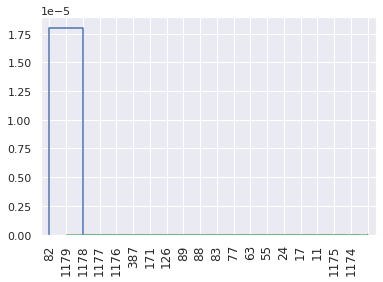

In [45]:
dn = dendrogram(
    Z_cosine,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

In [46]:
from scipy.cluster.hierarchy import fcluster
fl = fcluster(Z_cosine, 342)

In [22]:
list(Z_cosine[0])

[1040.0, 1170.0, 1.7657998175990564e-05, 2.0]

In [62]:
tmp = np.matmul(confusion_matrix, 1/np.diag(confusion_matrix))

/home/florian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [66]:
list(np.diag(confusion_matrix))

[2265.0,
 1614.0,
 102.0,
 223.0,
 796.0,
 2.0,
 133.0,
 610.0,
 1810.0,
 2014.0,
 156.0,
 1800.0,
 460.0,
 187.0,
 13233.0,
 1063.0,
 3615.0,
 1608.0,
 177.0,
 1820.0,
 98.0,
 57674.0,
 4958.0,
 25042.0,
 22785.0,
 144.0,
 430.0,
 726.0,
 89.0,
 598.0,
 289.0,
 856.0,
 137.0,
 101.0,
 4796.0,
 438.0,
 6418.0,
 1319.0,
 828.0,
 1009.0,
 78.0,
 615.0,
 168.0,
 472.0,
 58.0,
 1029.0,
 5638.0,
 1969.0,
 1444.0,
 671.0,
 2179.0,
 291.0,
 301.0,
 254.0,
 845.0,
 19864.0,
 391.0,
 419.0,
 5291.0,
 122.0,
 1256.0,
 146.0,
 1628.0,
 6393.0,
 73.0,
 6.0,
 903.0,
 1939.0,
 474.0,
 639.0,
 309.0,
 4333.0,
 1439.0,
 444.0,
 4.0,
 801.0,
 134.0,
 15872.0,
 2059.0,
 473.0,
 0.0,
 57.0,
 5699.0,
 11893.0,
 1504.0,
 1720.0,
 93.0,
 7.0,
 3462.0,
 19389.0,
 165.0,
 259.0,
 46.0,
 68.0,
 503.0,
 976.0,
 708.0,
 6.0,
 78.0,
 6.0,
 1502.0,
 84.0,
 320.0,
 3.0,
 2491.0,
 56.0,
 1543.0,
 116.0,
 0.0,
 52.0,
 238.0,
 752.0,
 1044.0,
 7.0,
 559.0,
 1260.0,
 905.0,
 331.0,
 428.0,
 7030.0,
 651.0,
 1022.0,
 37